In [1]:
import pandas as pd
data = pd.read_csv('C:\PYTHON\PYTHONCODE\AMZN.csv', index_col='Date', parse_dates=True)

In [2]:
'''
BEFORE WE START WITH MATPLOTLIB- LIKE ALWAYS LETS UNDERSTAND THE DATA AT HAND
'''

'\nBEFORE WE START WITH MATPLOTLIB- LIKE ALWAYS LETS UNDERSTAND THE DATA AT HAND\n'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1385 entries, 2014-12-31 to 2020-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1385 non-null   float64
 1   Low        1385 non-null   float64
 2   Open       1385 non-null   float64
 3   Close      1385 non-null   float64
 4   Volume     1385 non-null   int64  
 5   Adj Close  1385 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 75.7 KB


In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,312.980011,310.010010,311.549988,310.350006,2048000,310.350006
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013


In [5]:
data.index.min()

Timestamp('2014-12-31 00:00:00')

In [6]:
data.index.max()

Timestamp('2020-07-01 00:00:00')

In [7]:
'''
CONCLUSION
This is daily HLOCVAdjClose data; for AMAZON - from Jan'2015 to June'2020. 
The data is indexed by Datetime index .
Now that we have an understanding of the data, we shall calculate the daily return, upsample
and start plotting
'''

"\nCONCLUSION\nThis is daily HLOCVAdjClose data; for AMAZON - from Jan'2015 to June'2020. \nThe data is indexed by Datetime index .\nNow that we have an understanding of the data, we shall calculate the daily return, upsample\nand start plotting\n"

In [8]:
'''
In the below, I calculate the daily returns for Amazon
Upsample the data - to a frequency of - Monthly mean
Upsample the data - to a frequency of - quarterly mean
Upsample the data - to a frequency of - half-yearly mean
'''

'\nIn the below, I calculate the daily returns for Amazon\nUpsample the data - to a frequency of - Monthly mean\nUpsample the data - to a frequency of - quarterly mean\nUpsample the data - to a frequency of - half-yearly mean\n'

In [9]:
AMAZON_RET = data[['Adj Close']].pct_change();

In [10]:
AMAZON_RET_MON = AMAZON_RET.resample('M').mean()

In [11]:
AMAZON_RET_3MON = AMAZON_RET.resample('3M').mean()

In [12]:
AMAZON_RET_6MON = AMAZON_RET.resample('6M').mean()

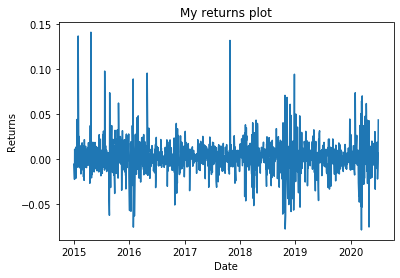

In [13]:
'''
My first basic matplotlib plot
------------------------------
1- Import the library
2- Define the labels 
3- Plot the chart 
'''
import matplotlib.pyplot as plt

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('My returns plot')

plt.plot(AMAZON_RET);


In [14]:
'''
CREATING SUB-PLOTS METHOD -1
-----------------------------
In the below, we learn to create sub-plot 
Subplots are created as - plt.subplot(2,3,1)  
                --implying divide the canvas into 2 rows, 3 columns and use the first sub-plot.
I've used plt.axis('off') - so that the x and y axis are not available to me *we shall learn later on how to set 
ticks and work upon the axes.
'''

"\nCREATING SUB-PLOTS METHOD -1\n-----------------------------\nIn the below, we learn to create sub-plot \nSubplots are created as - plt.subplot(2,3,1)  \n                --implying divide the canvas into 2 rows, 3 columns and use the first sub-plot.\nI've used plt.axis('off') - so that the x and y axis are not available to me *we shall learn later on how to set \nticks and work upon the axes.\n"

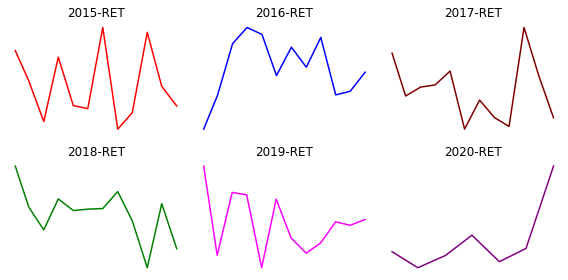

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 4))

plt.subplot(2,3,1)
plt.plot(AMAZON_RET_MON['2015'], 'r')
plt.title('2015-RET')
plt.axis('off')

plt.subplot(2,3,2)
plt.plot(AMAZON_RET_MON['2016'], 'b')
plt.title('2016-RET')
plt.axis('off')


plt.subplot(2,3,3)
plt.plot(AMAZON_RET_MON['2017'], 'maroon')
plt.title('2017-RET')
plt.axis('off')

plt.subplot(2,3,4)
plt.plot(AMAZON_RET_MON['2018'], 'green')
plt.title('2018-RET')
plt.axis('off')

plt.subplot(2,3,5)
plt.plot(AMAZON_RET_MON['2019'], 'magenta')
plt.title('2019-RET')
plt.axis('off')


plt.subplot(2,3,6)
plt.plot(AMAZON_RET_MON['2020'], 'purple')
plt.title('2020-RET')
plt.axis('off')

plt.tight_layout()

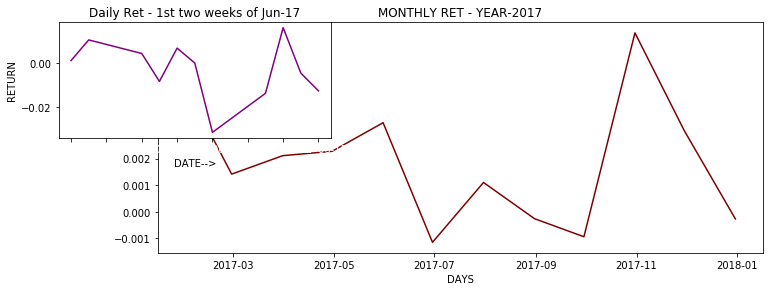

In [16]:
'''
CREATING SUB-PLOTS METHOD -2
-----------------------------
Create subplots using the axes method
axes=fig.add_axes([left, bottom, width, height])
'''

import matplotlib.pyplot as plt
fig = plt.figure()

axes1 = fig.add_axes([1.18,0.1,1.4,0.8])
axes1.plot(AMAZON_RET_MON['2017'],'maroon')
axes1.set_title('MONTHLY RET - YEAR-2017')
axes1.set_xlabel('DAYS')
axes1.set_label('RETURN')
#plt.axis('off')

axes2 = fig.add_axes([.95,0.5,.63,0.4])
axes2.plot(AMAZON_RET['2017-6-1':'2017-6-15'],'purple')
axes2.set_title('Daily Ret - 1st two weeks of Jun-17')
axes2.set_xlabel('DATE-->')
axes2.set_ylabel('RETURN')
plt.xticks(color='w');



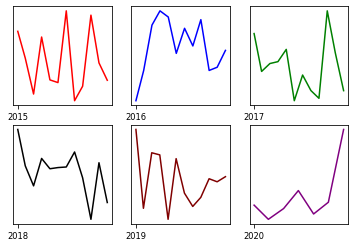

<Figure size 576x1440 with 0 Axes>

In [17]:
'''
OOPS METHOD
------------
plt.subplots() creates a new figure and returns a numpy array 
The sub-plots can be indexed like a 2 D array

I've divided the canvas into 2 rows and 3 columns; each cell represents a subplot.
Subplots can be accessed un the same method
0,1 - represents the 1st row, 2nd cell
1,0 - represents the 2nd row, 1st cell

'''

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3)
fig = plt.figure(figsize=(8, 20))


axes[0,0].plot(AMAZON_RET_MON['2015'],'red')
#axes[0,0].set_title('2015-RET')
ticks_to_use = (AMAZON_RET_MON['2015'].index[::20])
labels = [i.strftime("%Y") for i in ticks_to_use]
axes[0,0].set_xticks(ticks_to_use)
axes[0,0].set_xticklabels((labels),fontsize='small')
axes[0,0].yaxis.set_visible(False)



axes[0,1].plot(AMAZON_RET_MON['2016'],'blue')
#axes[0,1].set_title('2016-RET')
ticks_to_use = (AMAZON_RET_MON['2016'].index[::20])
labels = [i.strftime("%Y") for i in ticks_to_use]
axes[0,1].set_xticks(ticks_to_use)
axes[0,1].set_xticklabels((labels),fontsize='small')
axes[0,1].yaxis.set_visible(False)



axes[0,2].plot(AMAZON_RET_MON['2017'],'green')
#axes[0,2].set_title('2017-RET')
ticks_to_use = (AMAZON_RET_MON['2017'].index[::20])
labels = [i.strftime("%Y") for i in ticks_to_use]
axes[0,2].set_xticks(ticks_to_use)
axes[0,2].set_xticklabels((labels),fontsize='small')
axes[0,2].yaxis.set_visible(False)



axes[1,0].plot(AMAZON_RET_MON['2018'],'black')
#axes[1,0].set_title('2018-RET')
ticks_to_use = (AMAZON_RET_MON['2018'].index[::20])
labels = [i.strftime("%Y") for i in ticks_to_use]
axes[1,0].set_xticks(ticks_to_use)
axes[1,0].set_xticklabels((labels),fontsize='small')
axes[1,0].yaxis.set_visible(False)



axes[1,1].plot(AMAZON_RET_MON['2019'],'maroon')
#axes[1,1].set_title('2019-RET')
ticks_to_use = (AMAZON_RET_MON['2019'].index[::20])
labels = [i.strftime("%Y") for i in ticks_to_use]
axes[1,1].set_xticks(ticks_to_use)
axes[1,1].set_xticklabels((labels),fontsize='small')
axes[1,1].yaxis.set_visible(False)



axes[1,2].plot(AMAZON_RET_MON['2020'],'purple');
#axes[1,2].set_title('2020-RET')
ticks_to_use = (AMAZON_RET_MON['2020'].index[::20])
labels = [i.strftime("%Y") for i in ticks_to_use]
axes[1,2].set_xticks(ticks_to_use)
axes[1,2].set_xticklabels((labels), fontsize='small')
axes[1,2].yaxis.set_visible(False)

plt.tight_layout();


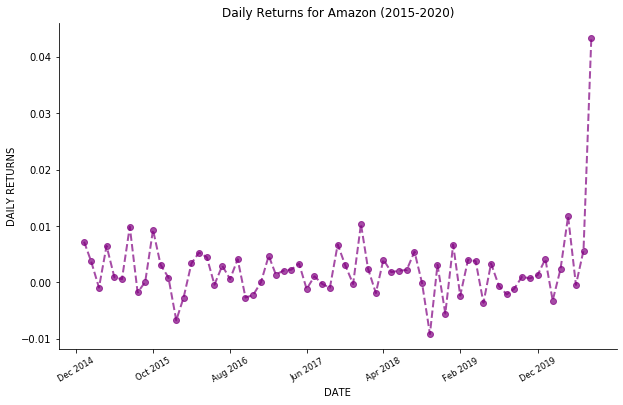

In [18]:
'''
A complete matplotlib plot 

'''
#Import matplotlib
import matplotlib.pyplot as plt

#Define the figure object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Define the data and how it needs to be plotted;
#ax.plot(AMAZON_RET_MON, color='purple', lw=2, alpha=0.7, linestyle='--', marker='o')
ax.plot(AMAZON_RET.resample('M').mean(), color='purple', lw=2, alpha=0.7, linestyle='--', marker='o')


'''
Given the x axis could get very populated as we are plotting around ~68 points, I now jump by 10
#values and condense it down to 7 points only
'''
ticks_to_use = (AMAZON_RET_MON.index[::10])
labels = [i.strftime("%b %Y") for i in ticks_to_use]

ax.set_xticks(ticks_to_use)
ax.set_xticklabels((labels), rotation =30,fontsize='small')

#The title, x and y labels
ax.set_title("Daily Returns for Amazon (2015-2020)")
ax.set_xlabel('DATE')
ax.set_ylabel('DAILY RETURNS')
#Remove the right and top boundaries
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Re-define the height and width of the plot
fig.set_figheight(6)
fig.set_figwidth(10)
#Finally save all the hardwork
plt.savefig("Amazon-Daily-Return(2015-2020)")